In [1]:
import dynpssimpy.dynamic as dps
import dynpssimpy.modal_analysis as dps_mdl
import dynpssimpy.plotting as dps_plt
import numpy as np
import matplotlib.pyplot as plt
import json
from sparculing.helper_functions import *
from sparculing.gen_sens import *

In [2]:
# with open('k2a.json') as f:
#     data= f.read()

# model = json.loads(data)  
sys = dps.PowerSystemModel('k2a.json')

In [3]:
# pl0 = get_load_power_vector(model)
pl0 = sys.loads['Load'].par['P'].copy()

# pg0=get_gen_power_vector(model)
pg0 = sys.gen['GEN'].par['P'].copy()

In [4]:
np.sum(pg0)

2819.0

Before load change:	P_load=[ 967. 1767.]	P_gen=[700.         700.         719.09238061 700.        ]
After load change:	P_load=[ 867. 1867.]	P_gen=[700.        700.        734.7668847 700.       ]


(-20.0, 1.0)

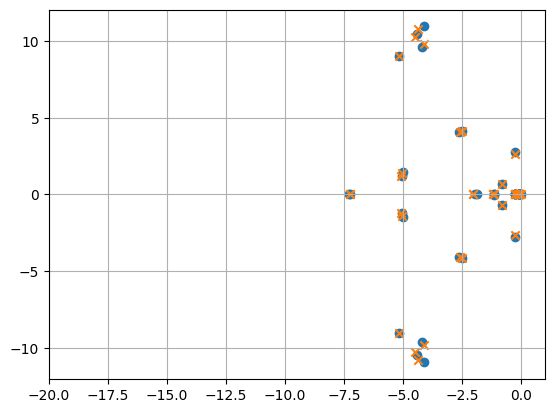

In [5]:
sys=dps.PowerSystemModel('k2a.json')
sys.init_dyn_sim()
lin_sys = dps_mdl.PowerSystemModelLinearization(sys)
lin_sys.eigenvalue_decomposition()
eigs_0 = lin_sys.eigs.copy()
print(f"Before load change:\tP_load={sys.loads['Load'].par['P']}\tP_gen={sys.gen['GEN'].P_e(sys.x_0, sys.v_0)}")


change_all_load_powers(sys, pl0+[-100,100])

sys.power_flow()
sys.init_dyn_sim()
lin_sys = dps_mdl.PowerSystemModelLinearization(sys)
lin_sys.eigenvalue_decomposition()
eigs_1 = lin_sys.eigs.copy()


print(f"After load change:\tP_load={sys.loads['Load'].par['P']}\tP_gen={sys.gen['GEN'].P_e(sys.x_0, sys.v_0)}")
# print(sys.s_0)

fig, ax = plt.subplots(1)
plt.grid()
ax.scatter(eigs_0.real, eigs_0.imag)
ax.scatter(eigs_1.real, eigs_1.imag, marker='x')
ax.set_xlim(-20, 1)

# print(eigs_0 - eigs_1)


In [6]:
change_all_load_powers(sys, pl0)

Before load change:	P_load=[ 967. 1767.]	P_gen=[700.         700.         719.09238061 700.        ]
After load change:	P_load=[ 967. 1767.]	P_gen=[800.         700.         738.50497797 600.        ]


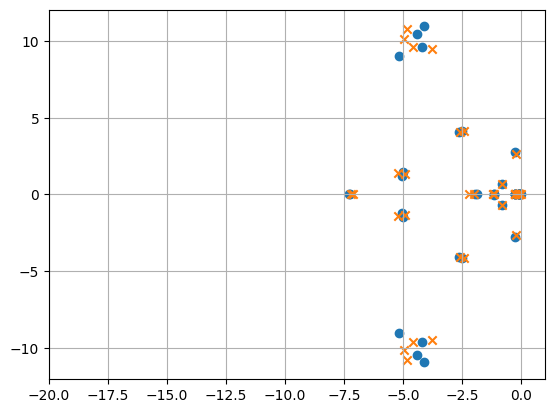

In [7]:
sys=dps.PowerSystemModel('k2a.json')
sys.init_dyn_sim()
print(f"Before load change:\tP_load={sys.loads['Load'].par['P']}\tP_gen={sys.gen['GEN'].P_e(sys.x_0, sys.v_0)}")

# sys.power_flow()
# sys.init_dyn_sim()
# lin_sys = dps_mdl.PowerSystemModelLinearization(sys)
# lin_sys.eigenvalue_decomposition()
lin_sys = get_lin_sys(sys)
eigs_0 = lin_sys.eigs.copy()



change_all_gen_powers(sys, pg0+[100,0,0,-100])
sys.power_flow()
sys.init_dyn_sim()
print(f"After load change:\tP_load={sys.loads['Load'].par['P']}\tP_gen={sys.gen['GEN'].P_e(sys.x_0, sys.v_0)}")

# sys.power_flow()
# sys.init_dyn_sim()
# lin_sys = dps_mdl.PowerSystemModelLinearization(sys)
# lin_sys.eigenvalue_decomposition()
lin_sys = get_lin_sys(sys)
eigs_1 = lin_sys.eigs.copy()

fig, ax = plt.subplots(1)
plt.grid()
ax.scatter(eigs_0.real, eigs_0.imag)
ax.scatter(eigs_1.real, eigs_1.imag, marker='x')
ax.set_xlim(-20, 1)

change_all_gen_powers(sys, pg0)

In [8]:
sys=dps.PowerSystemModel('k2a.json')
sys.init_dyn_sim()
ps_lin = dps_mdl.PowerSystemModelLinearization(sys)
ps_lin.linearize()
ps_lin.eigenvalue_decomposition()

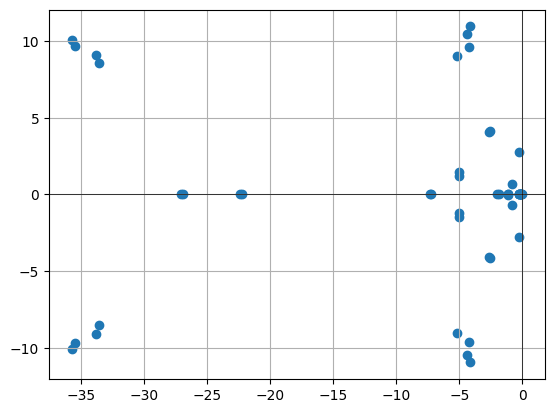

In [9]:
dps_plt.plot_eigs(ps_lin.eigs)

In [10]:
remove_inaccurate_zero(ps_lin)

In [11]:
np.argmin(ps_lin.damping)

30

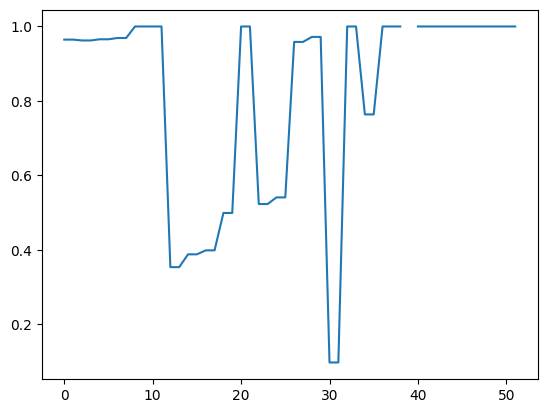

In [12]:
plt.plot(ps_lin.damping)

In [13]:
np.min(ps_lin.damping)

0.09737870900787997

In [14]:
senser = GenSensDispatchUnconstrained(sys)

In [15]:
# np.shape(senser.gen_sens)

In [16]:
dP = 2e-2
sens_single_gen, eigs_0, eigs_1 =senser.get_gen_sens_single_gen(0, dP=dP, return_eigs=True)

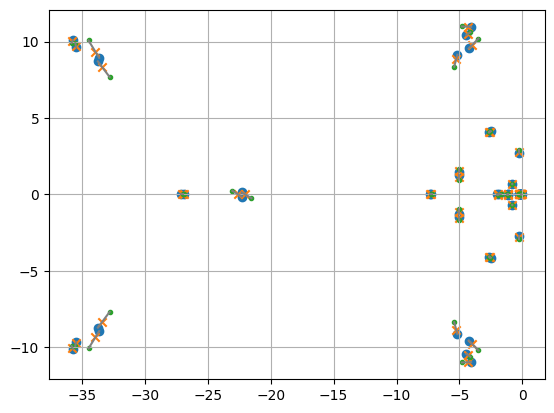

In [17]:

#genser = eigs_0 - eigs_1
eigs_pred = eigs_0 - sens_single_gen*dP*.5e4
linear_locus = np.vstack([eigs_0, eigs_pred]).T
eig_idx = slice(None)  # 10,17)  # 7, 8)
# print(np.argmin(np.abs(eigs_0 + 5 - 8j)))
# print(eigs_0[16])

plt.scatter(eigs_0[eig_idx].real, eigs_0[eig_idx].imag)
plt.scatter(eigs_1[eig_idx].real, eigs_1[eig_idx].imag, marker='x')
plt.scatter(eigs_pred[eig_idx].real, eigs_pred[eig_idx].imag, marker='.')
for line in linear_locus[eig_idx]:
    plt.plot(line.real, line.imag, color='gray')
# plt.xlim([-10, 1])
# plt.ylim([-10, 10])
plt.grid()

In [18]:
print(np.angle(eigs_0 - eigs_1)[0])
print(np.angle(sens_single_gen[0]))

-1.350608650058895
-1.350608650058895


(-0.015, 0.015)

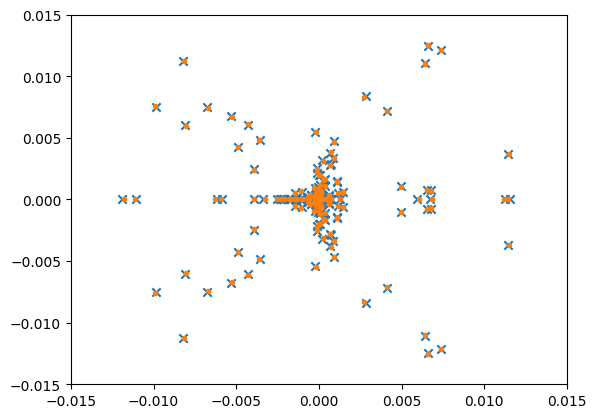

In [19]:
genser = senser.get_gen_sens(dP=2e-4)
genser2=senser.get_gen_sens(dP=3e-4)
#genser3=senser.get_gen_sens(dP=1e-4)
#genser4=senser.get_gen_sens(dP=1e-3)
#genser5=senser.get_gen_sens(dP=1e-2)

# np.max(abs(genser2-genser3))
plt.scatter(genser.real, genser.imag, marker='x')
plt.scatter(genser2.real, genser2.imag, marker='.')
# plt.scatter(genser3.real, genser3.imag, marker='.')
# plt.scatter(genser4.real, genser4.imag, marker='.')
# plt.scatter(genser4.real, genser5.imag, marker='.')
plt.xlim([-0.015, 0.015])
plt.ylim([-0.015, 0.015])

[700.3 700.9 719.3 700.3]
self.ps.gen['GEN'].par['P']=[700.3 700.9 719.3 700.3]
[699.4 698.2 718.4 699.4]
(-0.2535531021095494+0.402040749322607j)
abs(eigs)=0.4753166730772853


/Users/hallvar/Koding/bayes_rescheduling/.venv/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


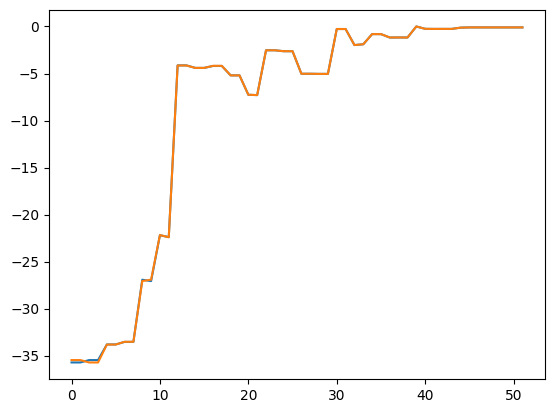

In [20]:
self = senser 
gen_i = 1
dP = 1e-3

sens = np.zeros(len(self.eigs_0), dtype=complex)
rating = self.ratings[gen_i]

change = rating * dP

powers = self._change_power_with_distributed_slack(change, gen_i)
print(powers)
change_all_gen_powers(self.ps, powers)
print(f"self.ps.gen['GEN'].par['P']={self.ps.gen['GEN'].par['P']}")
    
ps_lin = get_lin_sys(self.ps)
remove_inaccurate_zero(ps_lin)
sens = ps_lin.eigs.copy()
eigs_0 = ps_lin.eigs.copy()
# print(eigs_0[0])

powers = self._change_power_with_distributed_slack(-2 * change, gen_i)
print(powers)
change_all_gen_powers(self.ps, powers)

ps_lin = get_lin_sys(self.ps)
remove_inaccurate_zero(ps_lin)
    
sens -= ps_lin.eigs
print(sens[0])
sens = sens / (self.ratings[gen_i] * 2 * dP)
eigs_1 = ps_lin.eigs.copy()
print(f'abs(eigs)={abs(eigs_1[0] - eigs_0[0])}')

plt.plot(eigs_0)
plt.plot(eigs_1)
plt.show()
    
powers = self._change_power_with_distributed_slack(change, gen_i)
change_all_gen_powers(self.ps, powers)
# print(sens[0])

(-35.72412148691728+10.081053152851991j)
(-35.470838508478266+9.679249175743198j)
(-35.47056838480773+9.679012403529384j)
(-35.47056838480773+9.679012403529384j)


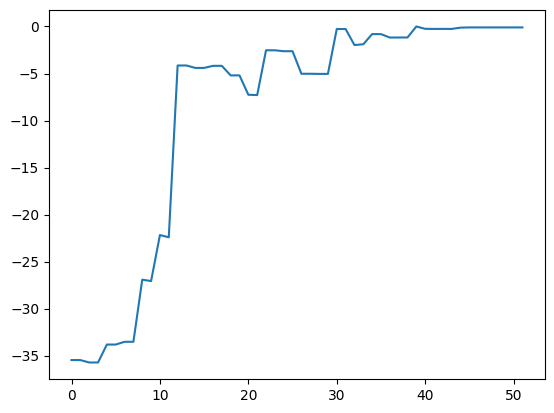

In [21]:
sens = np.zeros(len(self.eigs_0), dtype=complex)
rating = self.ratings[gen_i]

change = rating * dP
powers = self._change_power_with_distributed_slack(change, gen_i)
change_all_gen_powers(self.ps, powers)
    
ps_lin = get_lin_sys(self.ps)
remove_inaccurate_zero(ps_lin)
eigs_1 = ps_lin.eigs.copy()
print(eigs_1[0])
eigs_1 = match_eigenvalues(self.eigs_0, eigs_1)
print(eigs_1[0])
sens = eigs_1.copy()

powers = self._change_power_with_distributed_slack(-2 * change, gen_i)

change_all_gen_powers(self.ps, powers)

ps_lin = get_lin_sys(self.ps)
remove_inaccurate_zero(ps_lin)
eigs_2 = ps_lin.eigs.copy()
print(eigs_2[0])
eigs_2 = match_eigenvalues(self.eigs_0, eigs_2)
print(eigs_2[0])
sens -= eigs_2
sens = sens / (self.ratings[gen_i] * 2 * dP)

    
powers = self._change_power_with_distributed_slack(change, gen_i)
change_all_gen_powers(self.ps, powers)



plt.plot(eigs_2)
plt.show()

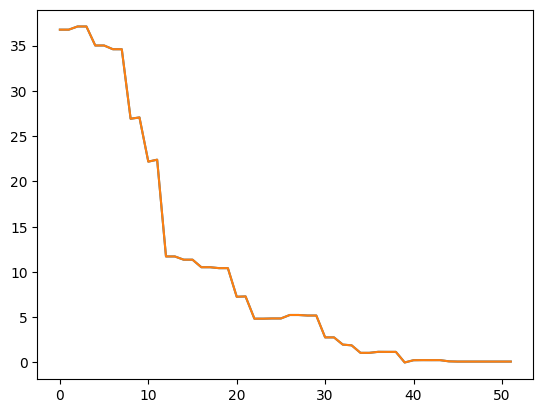

In [22]:
sens_single_gen, eigs_1, eigs_2 =senser.get_gen_sens_single_gen(0, dP=1e-5, return_eigs=True)

plt.plot(abs(eigs_1))
plt.plot(abs(eigs_2))
plt.show()

# This value of dP gives varying ordering of eigenvalues! Must do some kind of sorting.


In [23]:
# From https://stackoverflow.com/questions/54183370/how-to-sort-vector-to-have-minimal-distance-to-another-vector-efficiently
import numpy as np
from scipy import optimize

def match_eigenvalues(v1, v2, dist, return_idx=False):
    assert v1.ndim == v2.ndim == 1
    assert v1.shape[0] == v2.shape[0]
    n = v1.shape[0]
    t = np.dtype(dist(v1[0], v2[0]))
    dist_matrix = np.fromiter((dist(x1, x2) for x1 in v1 for x2 in v2),
                              dtype=t, count=n*n).reshape(n, n)
    row_ind, col_ind = optimize.linear_sum_assignment(dist_matrix)
    return (v2[col_ind], col_ind) if return_idx else v2[col_ind]

eigs_1_sorted, sort_idx = match_eigenvalues(eigs_0, eigs_1,  lambda x1, x2: abs(x1 - x2), True)

# plt.plot(abs(eigs_0))
# plt.plot(abs(eigs_1_sorted))
# plt.show()

# That works! Now included in GenSensDispatchUnconstrained

In [24]:
np.sum(genser-genser2)

(-0.0005488302061857392+0j)

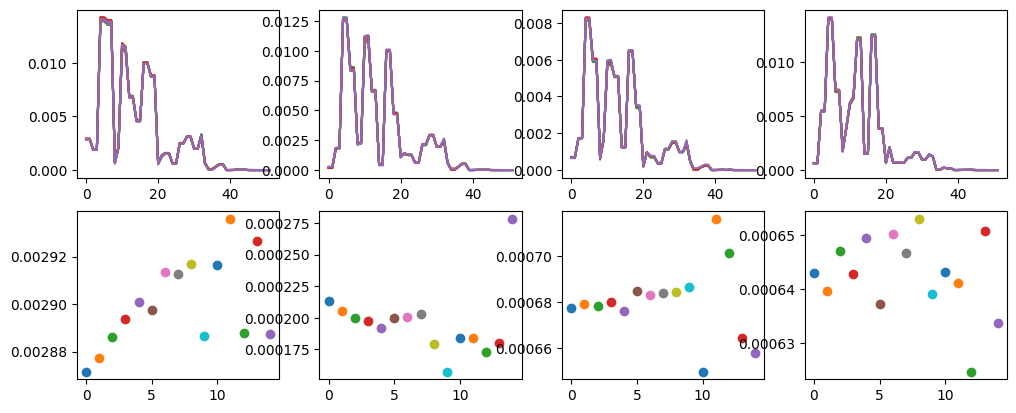

In [25]:
# Check sensitivity to dP
fig, ax = plt.subplots(2, 4)
fig.set_figwidth(12)
for i, dP in enumerate(10.0**(-np.arange(2.5, 4, 0.1))):  # , 3, 4, 5, 6, 7, 8])):
    # print(dP)
    genser_test = abs(senser.get_gen_sens(dP=dP))
    for i_gen, ax_ in enumerate(ax.T):
        ax_[0].plot(genser_test[:, i_gen], label=f'dP')
        ax_[1].scatter(i, genser_test[0, i_gen])

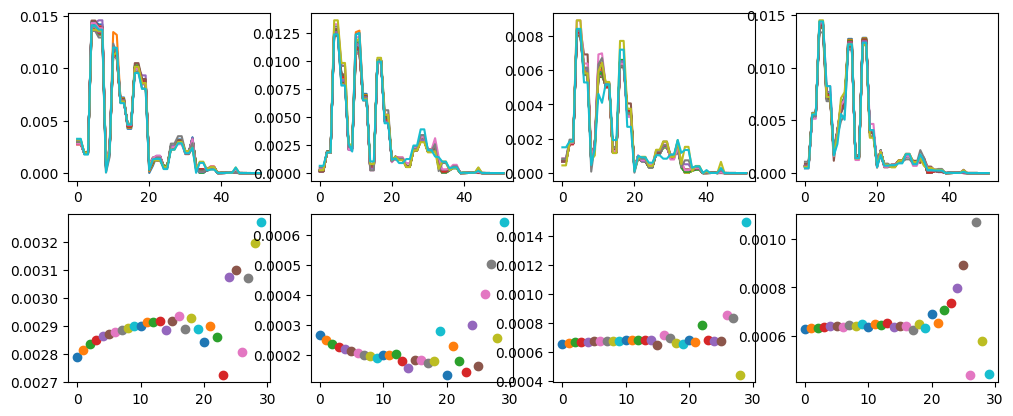

In [26]:

# Check sensitivity to dP
# Slightly wider range makes sensitivity vary more
fig, ax = plt.subplots(2, 4)
fig.set_figwidth(12)
for i, dP in enumerate(10.0**(-np.arange(2, 5, 0.1))):  # , 3, 4, 5, 6, 7, 8])):
    # print(dP)
    genser_test = abs(senser.get_gen_sens(dP=dP))
    for i_gen, ax_ in enumerate(ax.T):
        ax_[0].plot(genser_test[:, i_gen], label=f'dP')
        ax_[1].scatter(i, genser_test[0, i_gen])

In [32]:
from copy import deepcopy as copy

In [34]:
# copy(senser.ps)

In [35]:
jac = senser._make_jacobian(senser.zeta+0.01)

In [36]:
jac

array([[-1.80000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.49153224e-04,  1.00000000e+00],
       [ 0.00000000e+00, -6.00000000e-01,  0.00000000e+00,
         0.00000000e+00, -2.24597443e-04,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -6.00000000e-01,
         0.00000000e+00, -1.50191182e-04,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -6.00000000e-01, -3.91424541e-04,  1.00000000e+00],
       [-1.49153224e-04, -2.24597443e-04, -1.50191182e-04,
        -3.91424541e-04,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [37]:
np.linalg.solve(-jac, f)

NameError: name 'f' is not defined

In [ ]:
test=senser.get_gen_sens(dP=0.05)

In [ ]:
np.linalg.matrix_rank(jac)

In [ ]:
jac.shape

In [ ]:
jac[0,:]

In [ ]:
jac[1,:]

In [ ]:
senser.gen_sens[senser.min_mode, :]

In [ ]:
np.linalg.det(jac)

In [ ]:
senser.ps_lin_0.eigs[senser.min_mode]

In [ ]:
senser.ps_lin_0.damping[senser.min_mode]

In [ ]:
np.real(test[30,:])

In [ ]:
np.imag(test[30,:])

In [ ]:
(0.1/np.sqrt(1-0.01)*np.imag(test[30,:]))[1]-(0.1/np.sqrt(1-0.01)*np.imag(test[30,:]))[0]